# CLUSTERING ANALYSIS WORK

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
%matplotlib inline


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, mutual_info_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read in the data downloaded from World Bank Data

df = pd.read_csv('API_19_DS2_en_csv_v2_4151283.csv', skiprows=4)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.000000,...,44059.000000,44351.000000,44666.000000,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.544810,...,0.543931,0.660561,0.707733,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.000,55434.000000,56234.000000,56699.000000,57029.000000,57357.000000,...,102565.000000,103165.000000,103776.000000,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017,NaN


In [ ]:
# Check for the unique indicators in the dataset

df['Indicator Name'].unique()

array(['Urban population (% of total population)', 'Urban population',
       'Urban population growth (annual %)', 'Population, total',
       'Population growth (annual %)',
       'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Community health workers (per 1,000 people)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Primary completion rate, total (% of relevant age group)',
       'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'CPIA public sector management and institutions cluster average (1=low to 6=high)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Terrestrial and marine protected areas (% of total territorial area)',
       'Marine protected areas (% of territorial waters)',
       'Terrestrial protected 

In [ ]:
# Extract CO2 Emission records

df_co2 = df[df['Indicator Name']=='CO2 emissions from solid fuel consumption (% of total)']
df_co2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
37,Aruba,ABW,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,Africa Eastern and Southern,AFE,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,82.898414,82.135139,81.540091,81.208316,79.035536,79.527407,...,74.480709,71.663847,72.979637,70.246113,71.736710,NaN,NaN,NaN,NaN,NaN
189,Afghanistan,AFG,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,30.973451,35.820896,43.085106,37.305699,35.807860,37.818182,...,35.090909,46.322268,56.061434,49.750038,65.351001,NaN,NaN,NaN,NaN,NaN
265,Africa Western and Central,AFW,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,18.794475,17.755182,17.862538,13.441373,13.214473,9.876087,...,0.732431,0.666588,0.927653,1.031379,1.296756,NaN,NaN,NaN,NaN,NaN
341,Angola,AGO,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,22.666667,13.709677,7.763975,1.910828,6.287425,4.629630,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking the number of rows and columns in the dataset

df_co2.shape

(266, 66)

In [ ]:
# Ectract annual population growth records

df_elec = df[df['Indicator Name']=='Access to electricity (% of population)']
df_elec.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
61,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
137,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.844384,31.794160,32.001027,33.871910,38.880173,40.261358,43.061877,44.270860,45.803485,NaN
213,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,69.099998,68.290649,89.500000,71.500000,97.699997,97.699997,96.616135,97.699997,97.699997,NaN
289,Africa Western and Central,AFW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.167973,47.048316,47.599323,46.766294,50.953487,48.861191,51.259712,51.290193,52.111601,NaN
365,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.131321,38.278030,32.000000,42.000000,41.813129,43.013260,45.290001,45.642799,46.890610,NaN


In [ ]:
# Checking the number of rows and columns in the dataset

df_elec.shape

(266, 66)

In [ ]:
# Read in the dataset containing countries

countries = pd.read_csv('all_countries.csv')
countries.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [ ]:
# Rename and select neccessary columns

countries = countries.rename(columns={'name':'Country Name', 'alpha-3':'Country Code', 'region':'Region', 'sub-region':'Sub-Region'}, inplace=False)
countries = countries[['Country Name', 'Country Code', 'Region', 'Sub-Region']]
countries.head()

,Country Name,Country Code,Region,Sub-Region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [ ]:
# Merge datasets
df_marge1 = countries.merge(df_co2, on = ['Country Name', 'Country Code'])
df_marge2 = countries.merge(df_elec, on=['Country Name', 'Country Code'])
df_marge1.head()

,Country Name,Country Code,Region,Sub-Region,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Asia,Southern Asia,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,30.973451,35.820896,43.085106,37.305699,...,35.090909,46.322268,56.061434,49.750038,65.351001,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,Europe,Southern Europe,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,16.123188,14.147910,14.732143,13.556338,...,13.691201,11.483299,13.417567,4.484300,0.297525,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZA,Africa,Northern Africa,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,20.416667,12.636034,7.179819,4.662162,...,0.819458,0.558899,0.393619,0.344166,0.000000,NaN,NaN,NaN,NaN,NaN
3,American Samoa,ASM,Oceania,Polynesia,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Europe,Southern Europe,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check the dataset

df_marge2.head()

,Country Name,Country Code,Region,Sub-Region,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Asia,Southern Asia,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,...,69.099998,68.290649,89.500000,71.500000,97.699997,97.699997,96.616135,97.699997,97.699997,NaN
1,Albania,ALB,Europe,Southern Europe,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,...,99.900002,100.000000,99.949997,99.980003,99.889999,99.889999,100.000000,100.000000,100.000000,NaN
2,Algeria,DZA,Africa,Northern Africa,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,...,98.764664,99.002205,99.087013,99.186661,99.350250,99.635490,99.697838,99.500000,99.804131,NaN
3,American Samoa,ASM,Oceania,Polynesia,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Europe,Southern Europe,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN


In [ ]:
# Check the number of rows and columns

df_marge2.shape

(184, 68)

In [ ]:
# Drop un-needed columns
#df_marge1 = df_merge1.drop(['Region'], axis = 1, inplace=False)
df_marge1 = df_marge1.drop(['Indicator Code', 'Indicator Name'], axis=1, inplace=False)
df_marge2 = df_marge2.drop(['Indicator Code', 'Indicator Name'], axis=1, inplace=False)

In [ ]:
# Melt (unpivot) the dataframe

dataset1 = df_marge1.melt(id_vars=['Country Name', 'Country Code', 'Region', 'Sub-Region'], var_name='Year', value_name='CO2 emissions from solid fuel consumption (% of total)')
dataset1.head()

,Country Name,Country Code,Region,Sub-Region,Year,CO2 emissions from solid fuel consumption (% of total)
0,Afghanistan,AFG,Asia,Southern Asia,1960,30.973451
1,Albania,ALB,Europe,Southern Europe,1960,16.123188
2,Algeria,DZA,Africa,Northern Africa,1960,20.416667
3,American Samoa,ASM,Oceania,Polynesia,1960,NaN
4,Andorra,AND,Europe,Southern Europe,1960,NaN


In [ ]:
# Melt (unpivot) the dataframe

dataset2 = df_marge2.melt(id_vars=['Country Name', 'Country Code', 'Region', 'Sub-Region'], var_name='Year', value_name='Access to electricity (% of population)')
dataset2.head()

,Country Name,Country Code,Region,Sub-Region,Year,Access to electricity (% of population)
0,Afghanistan,AFG,Asia,Southern Asia,1960,NaN
1,Albania,ALB,Europe,Southern Europe,1960,NaN
2,Algeria,DZA,Africa,Northern Africa,1960,NaN
3,American Samoa,ASM,Oceania,Polynesia,1960,NaN
4,Andorra,AND,Europe,Southern Europe,1960,NaN


In [ ]:
# Merge the dataset

merged_data = dataset1.merge(dataset2, on = ['Country Name', 'Country Code', 'Region', 'Sub-Region', 'Year'])
merged_data.head()

,Country Name,Country Code,Region,Sub-Region,Year,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
0,Afghanistan,AFG,Asia,Southern Asia,1960,30.973451,NaN
1,Albania,ALB,Europe,Southern Europe,1960,16.123188,NaN
2,Algeria,DZA,Africa,Northern Africa,1960,20.416667,NaN
3,American Samoa,ASM,Oceania,Polynesia,1960,NaN,NaN
4,Andorra,AND,Europe,Southern Europe,1960,NaN,NaN


In [ ]:
# Extract data from year 1990 and above

new_data = merged_data[merged_data['Year']>='1990']
new_data.head()

,Country Name,Country Code,Region,Sub-Region,Year,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
5520,Afghanistan,AFG,Asia,Southern Asia,1990,9.415270,NaN
5521,Albania,ALB,Europe,Southern Europe,1990,41.337091,100.0
5522,Algeria,DZA,Africa,Northern Africa,1990,4.337312,NaN
5523,American Samoa,ASM,Oceania,Polynesia,1990,NaN,NaN
5524,Andorra,AND,Europe,Southern Europe,1990,0.000000,100.0


In [ ]:
# Check for the percentage of missing observations in each column

new_data.isnull().mean()

Country Name                                              0.000000
Country Code                                              0.000000
Region                                                    0.000000
Sub-Region                                                0.000000
Year                                                      0.000000
CO2 emissions from solid fuel consumption (% of total)    0.260530
Access to electricity (% of population)                   0.151325
dtype: float64

In [ ]:
# Replacing the missing values with the mean value (to avoid adding more noise to the data)

data_1 = new_data.fillna(new_data['CO2 emissions from solid fuel consumption (% of total)'].mean())
data_1 = new_data.fillna(new_data['Access to electricity (% of population)'].mean())
data_1.head()

,Country Name,Country Code,Region,Sub-Region,Year,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
5520,Afghanistan,AFG,Asia,Southern Asia,1990,9.415270,80.747495
5521,Albania,ALB,Europe,Southern Europe,1990,41.337091,100.000000
5522,Algeria,DZA,Africa,Northern Africa,1990,4.337312,80.747495
5523,American Samoa,ASM,Oceania,Polynesia,1990,80.747495,80.747495
5524,Andorra,AND,Europe,Southern Europe,1990,0.000000,100.000000


In [ ]:
# Check the number of rows and columns

data_1.shape

(5888, 7)

In [ ]:
# Create functions to normalize the data

def norm(array):
    """ Returns array normalised to [0,1]. Array can be a numpy array 
    or a column of a dataframe"""

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled

def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[5:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [ ]:
# Normalize the data

norm_data = norm_df(data_1)
norm_data.head()

,Country Name,Country Code,Region,Sub-Region,Year,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
5520,Afghanistan,AFG,Asia,Southern Asia,1990,0.043459,0.806442
5521,Albania,ALB,Europe,Southern Europe,1990,0.190803,1.000000
5522,Algeria,DZA,Africa,Northern Africa,1990,0.020020,0.806442
5523,American Samoa,ASM,Oceania,Polynesia,1990,0.372712,0.806442
5524,Andorra,AND,Europe,Southern Europe,1990,0.000000,1.000000


In [ ]:
# Group the data by year

year_data = norm_data.groupby('Year').mean().reset_index()
year_data.head()

,Year,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
0,1990,0.138652,0.874713
1,1991,0.135097,0.856732
2,1992,0.108919,0.840216
3,1993,0.107784,0.827983
4,1994,0.105119,0.822164


In [ ]:
# Check the number of rows and columns in the datas upon grouping by year

year_data.shape

(32, 3)

## Fit Exponential Curve

In [ ]:
year_data['Year'] = year_data['Year'].astype(float)
year_data.head()

,Year,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
0,1990.0,0.138652,0.874713
1,1991.0,0.135097,0.856732
2,1992.0,0.108919,0.840216
3,1993.0,0.107784,0.827983
4,1994.0,0.105119,0.822164


In [ ]:
co2 = year_data['CO2 emissions from solid fuel consumption (% of total)']
electricity = year_data['Access to electricity (% of population)']
year= year_data['Year']

In [ ]:
# Fit exponential curve for CO2 emission

from scipy.optimize import curve_fit

def exp_fit(x, a, b, c):
    y = a * np.exp(-b * x) + c
    return y

fit = curve_fit(exp_fit, year, co2, p0=[0.005, 0.03, 5])
fit_eq = fit[0][0]*np.exp(fit[0][1]*year+fit[0][2])

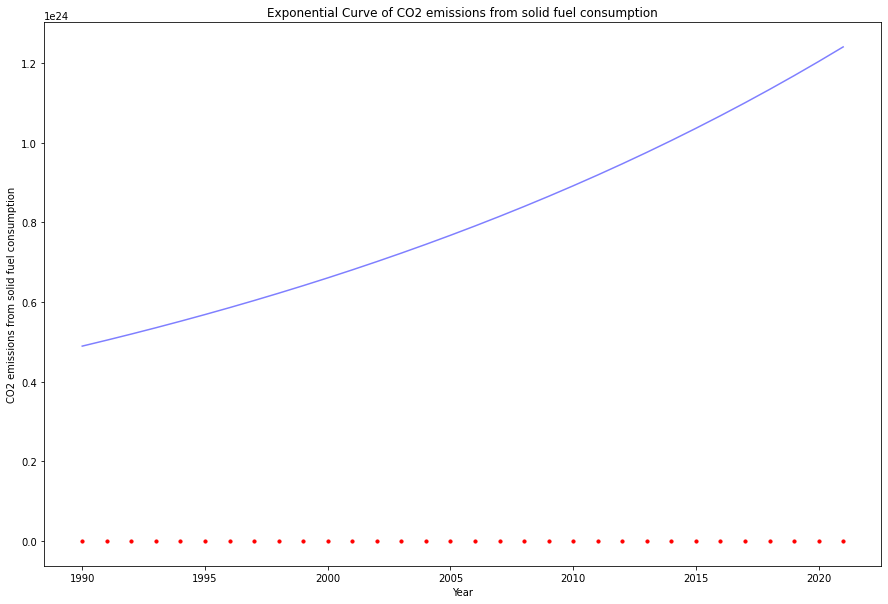

In [ ]:
# Plot the curve
fig = plt.figure()

# Set fig size
fig.set_size_inches(15, 10)

ax = fig.subplots()
ax.scatter(year, co2, color='r', s=10)
ax.plot(year, fit_eq, color='b', alpha=0.5)
ax.set_ylabel('CO2 emissions from solid fuel consumption')
ax.set_xlabel('Year')

plt.title('Exponential Curve of CO2 emissions from solid fuel consumption')
plt.show()

fig.savefig('Exponential Curve of CO2 emissions from solid fuel consumption')

Fitting the exponential curve, we found that CO2 emissions from solid fuel consumption exhibits an upward trend, which indicates that CO2 emissions from solid fuel consumption will most likely continue to increase over the years.

In [ ]:
# Fit exponential curve for population growth

from scipy.optimize import curve_fit

def exp_fit(x, a, b, c):
    y = a * np.exp(-b * x) + c
    return y

fit = curve_fit(exp_fit, year, electricity, p0=[0.005, 0.03, 5])
fit_eq = fit[0][0]*np.exp(fit[0][1]*year+fit[0][2])

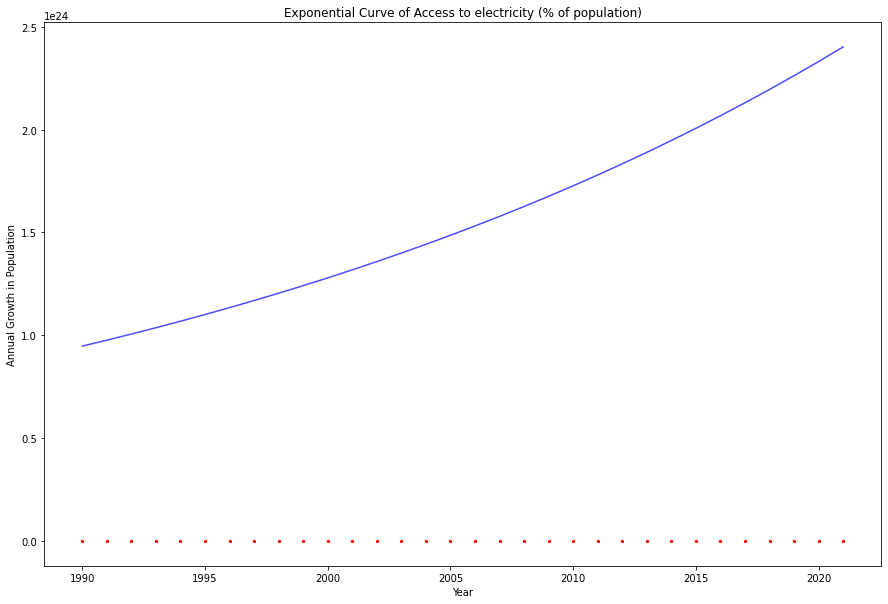

In [ ]:
fig = plt.figure()

# Set fig size
fig.set_size_inches(15, 10)

ax = fig.subplots()
ax.scatter(year, electricity, color='r', s=5)
ax.plot(year, fit_eq, color='b', alpha=0.7)
ax.set_ylabel('Annual Growth in Population')
ax.set_xlabel('Year')

plt.title('Exponential Curve of Access to electricity (% of population)')
plt.show()

fig.savefig('Exponential Curve of Access to electricity (% of population).png')

Fitting the exponential curve, we found that Access to electricity (% of population) exhibits an upward trend, which indicates that Access to electricity (% of population) will most likely continue to increase over the years.

## Applying clustering

In [ ]:
# Group the data by Country

country_data = norm_data.groupby(['Country Name', 'Region']).mean().reset_index()
country_data.head()

,Country Name,Region,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
0,Afghanistan,Asia,0.125354,0.620208
1,Albania,Europe,0.096450,0.993829
2,Algeria,Africa,0.067037,0.927580
3,American Samoa,Oceania,0.372712,0.806442
4,Andorra,Europe,0.058236,0.993951


In [ ]:
# Check the data

country_data.head()

,Country Name,Region,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
0,Afghanistan,Asia,0.125354,0.620208
1,Albania,Europe,0.096450,0.993829
2,Algeria,Africa,0.067037,0.927580
3,American Samoa,Oceania,0.372712,0.806442
4,Andorra,Europe,0.058236,0.993951


In [ ]:
# Extract the data for clustering

x = country_data.iloc[:, 2:]
x.head()

,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
0,0.125354,0.620208
1,0.096450,0.993829
2,0.067037,0.927580
3,0.372712,0.806442
4,0.058236,0.993951


In [ ]:
# Using the elbow approach, find the optimized number of clusters in the available dataset

wcss = [] 
for k in range(1, 10): 
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

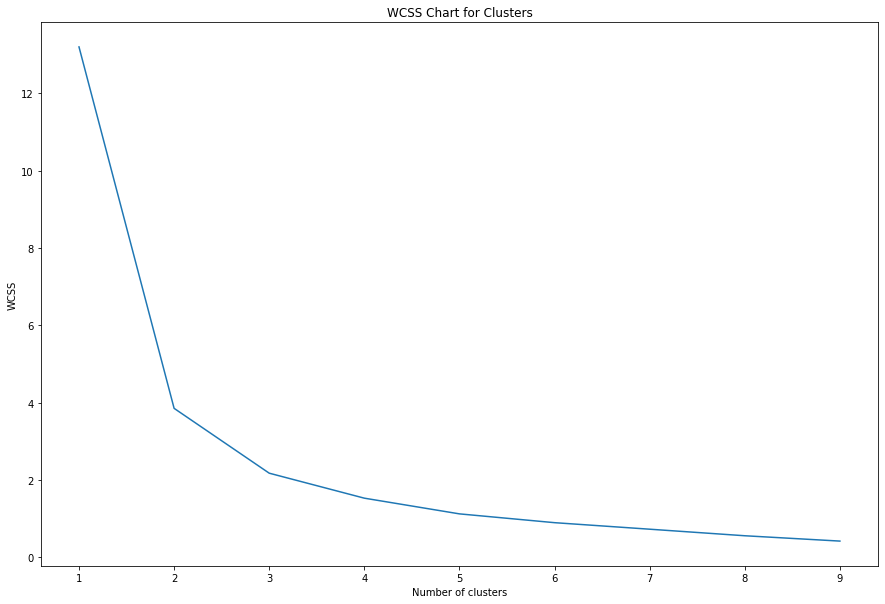

In [ ]:
# Plot the elbow chart
fig, ax = plt.subplots()

# Set fig size
fig.set_size_inches(15, 10)

plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('WCSS Chart for Clusters')
plt.show()

fig.savefig('WCSS Chart for Clusters.png')

The above elbow chart (WCSS Chart) shows that the number of optimized clusters for the dataset is four (4).

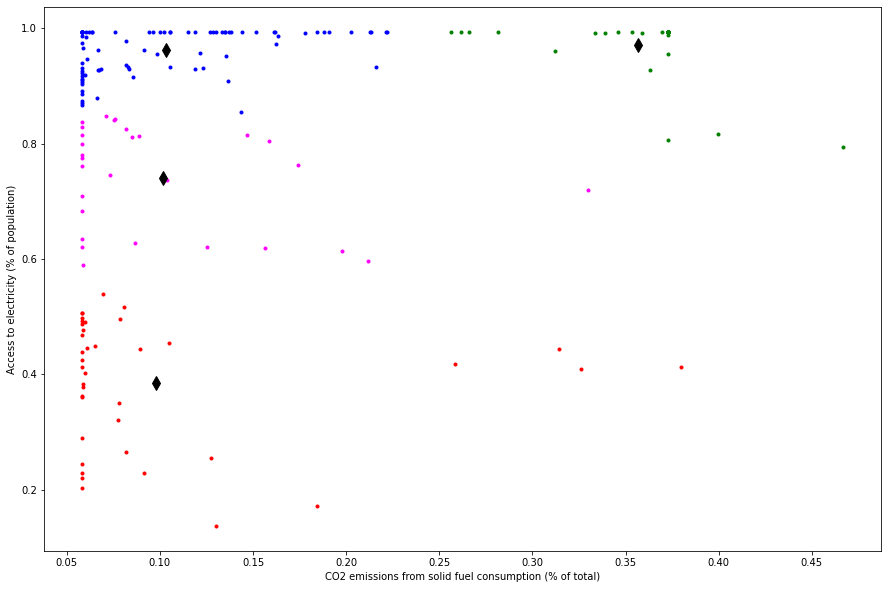

In [ ]:
####### kmeans set up the clusterer, 4 expected clusters
kmeans = KMeans(n_clusters=4)

# extract columns for fitting
df_fit = country_data[["CO2 emissions from solid fuel consumption (% of total)", "Access to electricity (% of population)",]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(15,10))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df_fit["CO2 emissions from solid fuel consumption (% of total)"][labels==l], df_fit["Access to electricity (% of population)"][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("CO2 emissions from solid fuel consumption (% of total)")
plt.ylabel("Access to electricity (% of population)")
plt.show()

In [ ]:
# Create a column for the matching clusters

df_fit['Cluster']= labels
df_fit.head()

,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population),Cluster
0,0.125354,0.620208,3
1,0.096450,0.993829,0
2,0.067037,0.927580,0
3,0.372712,0.806442,2
4,0.058236,0.993951,0


In [ ]:
# Merge the clustered data with the original data

final_data = country_data.merge(df_fit, on=['CO2 emissions from solid fuel consumption (% of total)','Access to electricity (% of population)',])
final_data.head()

,Country Name,Region,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population),Cluster
0,Afghanistan,Asia,0.125354,0.620208,3
1,Albania,Europe,0.096450,0.993829,0
2,Algeria,Africa,0.067037,0.927580,0
3,American Samoa,Oceania,0.372712,0.806442,2
4,Andorra,Europe,0.058236,0.993951,0


In [ ]:
final_data = final_data[['Country Name', 'Region', 'CO2 emissions from solid fuel consumption (% of total)','Access to electricity (% of population)', 'Cluster']]
final_data.head()

,Country Name,Region,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population),Cluster
0,Afghanistan,Asia,0.125354,0.620208,3
1,Albania,Europe,0.096450,0.993829,0
2,Algeria,Africa,0.067037,0.927580,0
3,American Samoa,Oceania,0.372712,0.806442,2
4,Andorra,Europe,0.058236,0.993951,0


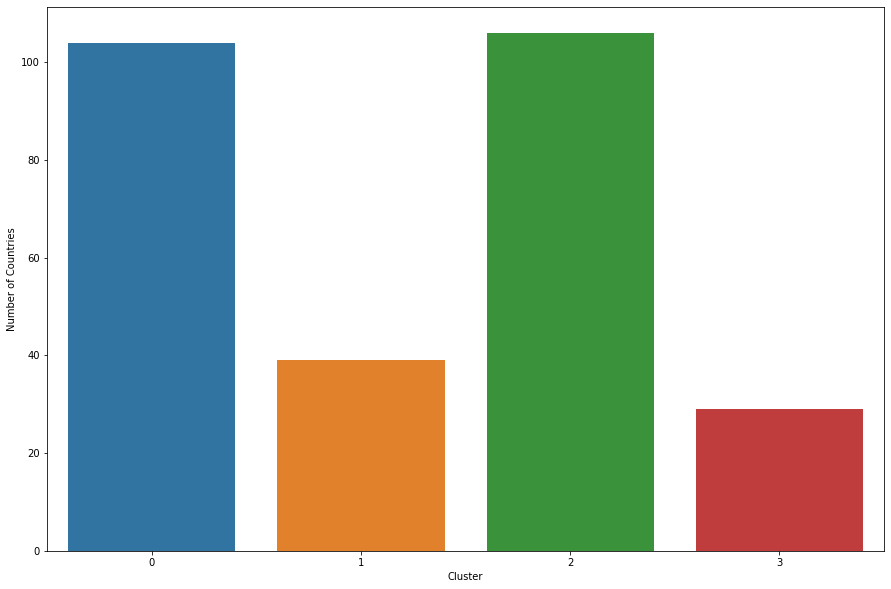

In [ ]:
fig, ax = plt.subplots()
# Set fig size
fig.set_size_inches(15, 10)

sns.countplot(final_data['Cluster'])
plt.ylabel('Number of Countries')
plt.xlabel('Cluster')
plt.show()

fig.savefig('Cluster Count Plot.png')

In [ ]:
final_data.Cluster.value_counts()

2    106
0    104
1     39
3     29
Name: Cluster, dtype: int64

There are 51 countries in cluster 1 (0), 35 in cluster 2 (1), 71 in cluster 3 (2) and 27 in cluster 4 (3).

In [ ]:
# Correlation

corr = df_fit.drop('Cluster', axis=1).corr()
corr

,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
CO2 emissions from solid fuel consumption (% of total),1.000000,0.277413
Access to electricity (% of population),0.277413,1.000000


Per unit increment in annual population growth, there is a decrement in CO2 emission across countries by over 25%

# Breakdown by Cluster

### Cluster 1

In [ ]:
c_1 = final_data[final_data['Cluster']==0]
c_1.head()

,Country Name,Region,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population),Cluster
1,Albania,Europe,0.096450,0.993829,0
2,Algeria,Africa,0.067037,0.927580,0
4,Andorra,Europe,0.058236,0.993951,0
5,Andorra,Europe,0.058236,0.993951,0
6,Andorra,Europe,0.058236,0.993951,0


In [ ]:
c_1.Region.value_counts()

Asia        42
Europe      32
Americas    20
Oceania      6
Africa       4
Name: Region, dtype: int64

In cluster 1, there is no countries from Europe, 7 from the Americas, 9 from Asia, 10 from Africa and 3 from Oceania.

In [ ]:
c_1.describe()

,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population),Cluster
count,104.000000,104.000000,104.0
mean,0.094506,0.967917,0.0
std,0.047991,0.038262,0.0
min,0.058236,0.854144,0.0
25%,0.058236,0.933157,0.0
50%,0.064848,0.993951,0.0
75%,0.127135,0.993951,0.0
max,0.222025,0.993951,0.0


In [ ]:
corr = c_1.drop('Cluster', axis=1).corr()
corr

,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
CO2 emissions from solid fuel consumption (% of total),1.000000,0.199649
Access to electricity (% of population),0.199649,1.000000


### Cluster 2

In [ ]:
c_2 = final_data[final_data['Cluster']==1]
c_2.head()

,Country Name,Region,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population),Cluster
29,Angola,Africa,0.058236,0.505526,1
38,Bangladesh,Asia,0.078520,0.496695,1
43,Benin,Africa,0.059627,0.402000,1
127,Botswana,Africa,0.258608,0.417592,1
130,Burkina Faso,Africa,0.058236,0.202594,1


In [ ]:
c_2.Region.value_counts()

Africa      33
Oceania      3
Asia         2
Americas     1
Name: Region, dtype: int64

In cluster 2, there is no countries from Europe, 1 from Americas each, 3 from Oceania, 2 from Asia, while 33 are from Africa.

In [ ]:
c_2.describe()

,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population),Cluster
count,39.000000,39.000000,39.0
mean,0.098072,0.385269,1.0
std,0.081343,0.109328,0.0
min,0.058236,0.136525,1.0
25%,0.058236,0.305636,1.0
50%,0.059627,0.412310,1.0
75%,0.085391,0.472143,1.0
max,0.379811,0.538356,1.0


In [ ]:
corr = c_2.drop('Cluster', axis=1).corr()
corr

,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
CO2 emissions from solid fuel consumption (% of total),1.000000,-0.043026
Access to electricity (% of population),-0.043026,1.000000


### Cluster 3

In [ ]:
c_3 = final_data[final_data['Cluster']==2]
c_3.head()

,Country Name,Region,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population),Cluster
3,American Samoa,Oceania,0.372712,0.806442,2
33,Aruba,Americas,0.372712,0.988487,2
34,Australia,Oceania,0.265862,0.993951,2
44,Bermuda,Americas,0.372712,0.993951,2
45,Bermuda,Americas,0.372712,0.993951,2


In [ ]:
c_3.Region.value_counts()

Europe      54
Americas    32
Oceania     16
Asia         3
Africa       1
Name: Region, dtype: int64

In cluster 3, there 1 countries from Africa, 3 from Asia, 32 from the Americas, 16 from Oceania and 54 from Europe.

In [ ]:
c_3.describe()

,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population),Cluster
count,106.000000,106.000000,106.0
mean,0.367886,0.987237,2.0
std,0.024003,0.032114,0.0
min,0.256240,0.794533,2.0
25%,0.372712,0.993951,2.0
50%,0.372712,0.993951,2.0
75%,0.372712,0.993951,2.0
max,0.466727,0.993951,2.0


In [ ]:
corr = c_3.drop('Cluster', axis=1).corr()
corr

,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
CO2 emissions from solid fuel consumption (% of total),1.00000,-0.29819
Access to electricity (% of population),-0.29819,1.00000


### Cluster 4

In [ ]:
c_4 = final_data[final_data['Cluster']==3]
c_4.head()

,Country Name,Region,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population),Cluster
0,Afghanistan,Asia,0.125354,0.620208,3
42,Belize,Americas,0.058236,0.838041,3
125,Bhutan,Asia,0.174361,0.762784,3
132,Cabo Verde,Africa,0.058236,0.780694,3
142,Comoros,Africa,0.058236,0.633869,3


In [ ]:
c_4.Region.value_counts()

Africa      10
Asia         9
Americas     7
Oceania      3
Name: Region, dtype: int64

In cluster 4, there 32 countries from Europe, 4 from Africa, 42 from Asia, 20 from the Americas, and 6 from Oceania.

In [ ]:
c_4.describe()

,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population),Cluster
count,29.000000,29.000000,29.0
mean,0.101433,0.740702,3.0
std,0.063936,0.088847,0.0
min,0.058236,0.590361,3.0
25%,0.058236,0.633869,3.0
50%,0.075571,0.762784,3.0
75%,0.125354,0.814436,3.0
max,0.329977,0.847600,3.0


In [ ]:
corr = c_4.drop('Cluster', axis=1).corr()
corr

,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
CO2 emissions from solid fuel consumption (% of total),1.000000,-0.265063
Access to electricity (% of population),-0.265063,1.000000


### Summary

According to the aforementioned analysis, nations in cluster 1 had more CO2 emissions per unit increment in annual Access to electricity (percent of population), whereas countries in cluster 2 had the least. This shows that activities that contribute to CO2 emissions are more prevalent in nations in cluster 1 than in any other cluster, but they are rapidly dropping in cluster 2 countries.

## Comparison of selected countries (from each cluster)

In [ ]:
# Create a dataframe containing only the first country in each cluster

df_comparison = data_1[(data_1['Country Name']=='Angola') | (data_1['Country Name']=='American Samoa') | (data_1['Country Name']=='Afghanistan') | (data_1['Country Name']=='Albania')]
df_comparison.head()

,Country Name,Country Code,Region,Sub-Region,Year,CO2 emissions from solid fuel consumption (% of total),Access to electricity (% of population)
5520,Afghanistan,AFG,Asia,Southern Asia,1990,0.043459,0.806442
5521,Albania,ALB,Europe,Southern Europe,1990,0.190803,1.000000
5523,American Samoa,ASM,Oceania,Polynesia,1990,0.372712,0.806442
5525,Angola,AGO,Africa,Sub-Saharan Africa,1990,0.000000,0.806442
5704,Afghanistan,AFG,Asia,Southern Asia,1991,0.042006,0.806442


In [ ]:
df_comparison.Region.nunique()

4

In [ ]:
df_comparison.Region.value_counts()

Asia       32
Europe     32
Oceania    32
Africa     32
Name: Region, dtype: int64

We found the picked countries each belongs to 4 unique regions.

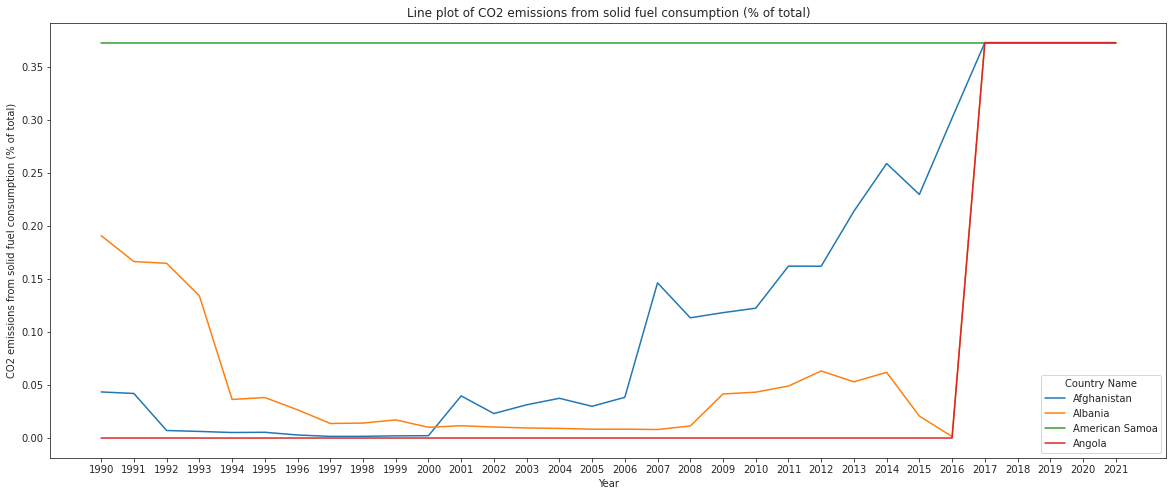

In [ ]:
# Line Plot of CO2 Emission

sns.set_style('ticks')
fig, ax = plt.subplots()

# setting fig size
fig.set_size_inches(20.00, 8.00)

sns.lineplot(x='Year', y='CO2 emissions from solid fuel consumption (% of total)', hue='Country Name', data=df_comparison)
plt.title('Line plot of CO2 emissions from solid fuel consumption (% of total)')
sns.despine

fig.savefig('Line plot of CO2 Emission.png')

From the above chart, we observed that between the year 1990 and year 2021;

1. CO2 emission in Angola has been on the increase, with an all-high value for the first time in the year 2016, while maining a uniform growth pattern in the year 2021.

2. CO2 emission in Afghanistan experience as sharp in the year 2000, and has since then maintained a relatively high value as compared with pre-2000 values. Since year 2000 it has been rising steadily and got a uniform pattern from 2016 till 2021.

3. CO2 emission in Albania has maintained a steady drop over the years. But since year 2016 it has increased drastically and gotten a uniform pattern up till 2021.